In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
from IPython.display import Image 
from pydot import graph_from_dot_data
import os
from sklearn import tree
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from IPython.display import display
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [2]:
# Using data as is

df = pd.read_csv("../Data/data.csv", sep=';')
X = df.drop("Target", axis=1)
# Use a 1D target array (LogisticRegression expects y to be 1D for multiclass)
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# specify multinomial for multiclass and increase max_iter if needed
logreg = LogisticRegression(solver='lbfgs', max_iter=10000)
logreg.fit(X_train, y_train)
# evaluate
print("Accuracy:", logreg.score(X_test, y_test))
#print("\nClassification report:\n", classification_report(y_test, y_pred))

Accuracy: 0.751412429378531


/home/manuela/miniconda3/envs/fys-course/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 10000 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [3]:
# Preprocessing raw data - ordinal encoder and max categories

df = pd.read_csv("../Data/data.csv", sep=';')
X = df.drop("Target", axis=1)
encoder = OrdinalEncoder(max_categories=20) # This limit gave best results
encoder.fit(X)
X = pd.DataFrame(encoder.transform(X), columns=X.columns)
# Use a 1D target array (LogisticRegression expects y to be 1D for multiclass)
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# specify multinomial for multiclass and increase max_iter if needed
logreg = LogisticRegression(solver='lbfgs', max_iter=10000)
logreg.fit(X_train, y_train)
# evaluate
print("Accuracy:", logreg.score(X_test, y_test))
#print("\nClassification report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7536723163841808


In [4]:
# Preprocessing raw data - one hot encoder

df = pd.read_csv("../Data/data.csv", sep=';')
X = df.drop("Target", axis=1)
encoder = OneHotEncoder(handle_unknown="ignore")
encoder.fit(X)
X = pd.DataFrame(encoder.transform(X).toarray(), columns=encoder.get_feature_names_out(X.columns))
# Use a 1D target array (LogisticRegression expects y to be 1D for multiclass)
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# specify multinomial for multiclass and increase max_iter if needed
logreg = LogisticRegression(solver='lbfgs', max_iter=10000)
logreg.fit(X_train, y_train)
# evaluate
print("Accuracy:", logreg.score(X_test, y_test))
#print("\nClassification report:\n", classification_report(y_test, y_pred))

Accuracy: 0.727683615819209


In [5]:
# Preprocessing raw data - ordinal encoder and l2 regularization

df = pd.read_csv("../Data/data.csv", sep=';')
X = df.drop("Target", axis=1)
encoder = OrdinalEncoder()
encoder.fit(X)
X = pd.DataFrame(encoder.transform(X), columns=X.columns)
# Use a 1D target array (LogisticRegression expects y to be 1D for multiclass)
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# specify multinomial for multiclass and increase max_iter if needed
logreg = LogisticRegression(solver='lbfgs', max_iter=10000, penalty='l2')
logreg.fit(X_train, y_train)
# evaluate
print("Accuracy:", logreg.score(X_test, y_test))
#print("\nClassification report:\n", classification_report(y_test, y_pred))

Accuracy: 0.751412429378531


/home/manuela/miniconda3/envs/fys-course/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 10000 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
# Preprocessing adjusted data - ordinal encoder

df = pd.read_csv("../Data/adjusted_data.csv", sep=';')
X = df.drop("Target", axis=1)
encoder = OrdinalEncoder()
encoder.fit(X)
X = pd.DataFrame(encoder.transform(X), columns=X.columns)
# Use a 1D target array (LogisticRegression expects y to be 1D for multiclass)
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# specify multinomial for multiclass and increase max_iter if needed
logreg = LogisticRegression(solver='lbfgs', max_iter=10000)
logreg.fit(X_train, y_train)
# evaluate
print("Accuracy:", logreg.score(X_test, y_test))
#print("\nClassification report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7570621468926554


In [7]:
# Preprocessing adjusted data - one hot encoder

df = pd.read_csv("../Data/adjusted_data.csv", sep=';')
X = df.drop("Target", axis=1)
encoder = OneHotEncoder(handle_unknown="ignore")
encoder.fit(X)
X = pd.DataFrame(encoder.transform(X).toarray(), columns=encoder.get_feature_names_out(X.columns))
# Use a 1D target array (LogisticRegression expects y to be 1D for multiclass)
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# specify multinomial for multiclass and increase max_iter if needed
logreg = LogisticRegression(solver='lbfgs', max_iter=10000)
logreg.fit(X_train, y_train)
# evaluate
print("Accuracy:", logreg.score(X_test, y_test))
#print("\nClassification report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7333333333333333


In [8]:
# Preprocessing adjusted data - ordinal encoder and l2 regularization

df = pd.read_csv("../Data/adjusted_data.csv", sep=';')
X = df.drop("Target", axis=1)
encoder = OrdinalEncoder()
encoder.fit(X)
X = pd.DataFrame(encoder.transform(X), columns=X.columns)
# Use a 1D target array (LogisticRegression expects y to be 1D for multiclass)
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# specify multinomial for multiclass and increase max_iter if needed
logreg = LogisticRegression(solver='lbfgs', max_iter=10000, penalty='l2')
logreg.fit(X_train, y_train)
# evaluate
print("Accuracy:", logreg.score(X_test, y_test))
#print("\nClassification report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7570621468926554


/home/manuela/miniconda3/envs/fys-course/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 10000 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0.73033708 0.76404494 0.75280899 0.69662921 0.76404494 0.76136364
 0.68181818 0.73863636 0.71590909 0.73863636]
Test set accuracy with Logistic Regression  and scaled data: 0.7570621468926554


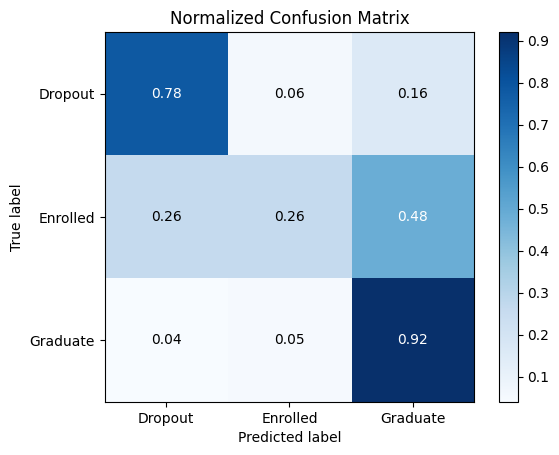

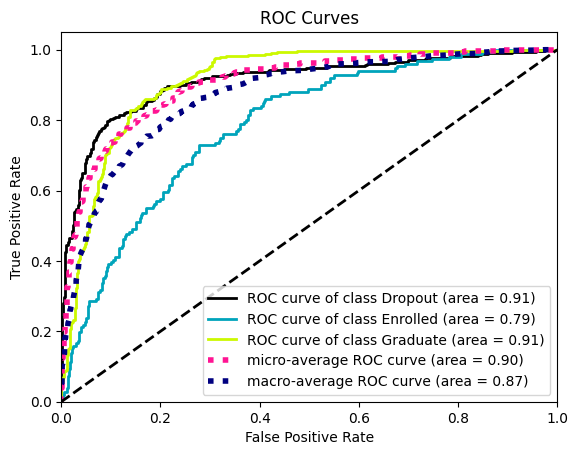

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
#Cross validation
accuracy = cross_validate(logreg,X_test,y_test,cv=10)['test_score']
print(accuracy)
print("Test set accuracy with Logistic Regression  and scaled data: {}".format(logreg.score(X_test,y_test)))


import scikitplot as skplt
y_pred = logreg.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()
y_probas = logreg.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)
plt.show()
#skplt.metrics.plot_cumulative_gain(y_test, y_probas)
#plt.show()

In [10]:
# Adjusted data + OrdinalEncoder + L2-regularized LogisticRegression with cross-validation


# load adjusted data
df_adj = pd.read_csv("../Data/adjusted_data.csv", sep=';')
X_adj = df_adj.drop("Target", axis=1)
y_adj = df_adj["Target"]

# ordinal encode all features (as done in prior cells)
encoder_adj = OrdinalEncoder()
X_enc = pd.DataFrame(encoder_adj.fit_transform(X_adj), columns=X_adj.columns)

# train/test split (stratify to preserve class proportions)
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(
    X_enc, y_adj, test_size=0.2, random_state=42, stratify=y_adj
)

# logistic regression with L2 (default) and multinomial for multiclass
lr = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=10000, multi_class='multinomial')

# grid search over inverse regularization strength C, using stratified k-fold CV
param_grid = {'C': [0.01, 0.1, 1.0, 10.0, 100.0]}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(lr, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)

# fit grid on training portion
grid.fit(X_train_cv, y_train_cv)

# report CV results and evaluate on held-out test set
print("Best params:", grid.best_params_)
print("Best CV accuracy:", grid.best_score_)

y_pred = grid.predict(X_test_cv)
print("Test accuracy:", accuracy_score(y_test_cv, y_pred))
print("\nClassification report:\n", classification_report(y_test_cv, y_pred))
print("\nConfusion matrix:\n", confusion_matrix(y_test_cv, y_pred))

/home/manuela/miniconda3/envs/fys-course/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/manuela/miniconda3/envs/fys-course/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/manuela/miniconda3/envs/fys-course/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/manuela/miniconda3/envs/fys-course/lib/python3.10

Best params: {'C': 0.1}
Best CV accuracy: 0.7688586292043247
Test accuracy: 0.7694915254237288

Classification report:
               precision    recall  f1-score   support

     Dropout       0.79      0.78      0.78       284
    Enrolled       0.55      0.31      0.40       159
    Graduate       0.80      0.93      0.86       442

    accuracy                           0.77       885
   macro avg       0.71      0.67      0.68       885
weighted avg       0.75      0.77      0.75       885


Confusion matrix:
 [[221  21  42]
 [ 47  50  62]
 [ 12  20 410]]
